## Setup evnironment

In [1]:
import os
import numpy as np
import pandas as pd
import json
from skimage.io import imread

In [2]:
from psf import compute, plotPSF

## Setup plotting

In [3]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_context('paper', font_scale=2.0)
sns.set_style('ticks')

In [4]:
from IPython.html.widgets import interactive
from IPython.html.widgets import IntSliderWidget 
from IPython.display import display

/Users/sofroniewn/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


ImportError: cannot import name IntSliderWidget

## Define parameters

In [7]:
FOVumLat = 61.0
FOVpxLat = 512.0 # 512
pxPerUmLat = FOVpxLat/FOVumLat
pxPerUmAx = 2.0 # 2.0
wavelength = 970.0
NA = 0.6
windowUm = [12, 2, 2]
options = {'FOVumLat':FOVumLat, 'FOVpxLat':FOVpxLat, 'pxPerUmLat':FOVpxLat/FOVumLat, 'pxPerUmAx':pxPerUmAx, 'wavelength':970.0, 'NA':0.6, 'windowUm':windowUm}
options['thresh'] = .05

In [8]:
options

{'FOVpxLat': 512.0,
 'FOVumLat': 61.0,
 'NA': 0.6,
 'pxPerUmAx': 2.0,
 'pxPerUmLat': 8.39344262295082,
 'thresh': 0.05,
 'wavelength': 970.0,
 'windowUm': [12, 2, 2]}

## Get PSF

In [9]:
im = imread('./data/images.tif', plugin='tifffile')   

In [10]:
data, beads, maxima, centers, smoothed = compute(im, options)

/Users/sofroniewn/anaconda/lib/python2.7/site-packages/skimage/filters/_gaussian.py:13: skimage_deprecation: Call to deprecated function ``gaussian_filter``. Use ``skimage.filters.gaussian`` instead.
  multichannel=None):
psf/main.py:22: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  volume = im[(center[0]-window[0]):(center[0]+window[0]), (center[1]-window[1]):(center[1]+window[1]), (center[2]-window[2]):(center[2]+window[2])]


In [11]:
PSF = pd.concat([x[0] for x in data])
PSF['Max'] = maxima
PSF = PSF.reset_index().drop(['index'],axis=1)
latProfile = [x[1] for x in data]
axProfile = [x[2] for x in data]

In [12]:
PSF

,FWHMlat,FWHMax,Max
0,0.974878,4.567987,525
1,0.985331,4.450624,156
2,0.971968,4.633858,512
3,0.883606,5.502221,153
4,0.882628,5.202208,123
5,0.999875,4.315810,179
6,0.927706,4.929884,165
7,1.009600,5.046590,300
8,0.977617,4.488589,350
9,0.957120,4.526076,74


In [15]:
print len(PSF)
print PSF.mean()
print PSF.std()

14
FWHMlat      0.951830
FWHMax       4.772319
Max        286.214286
dtype: float64
FWHMlat      0.061514
FWHMax       0.425010
Max        212.956904
dtype: float64


## Plot max projection

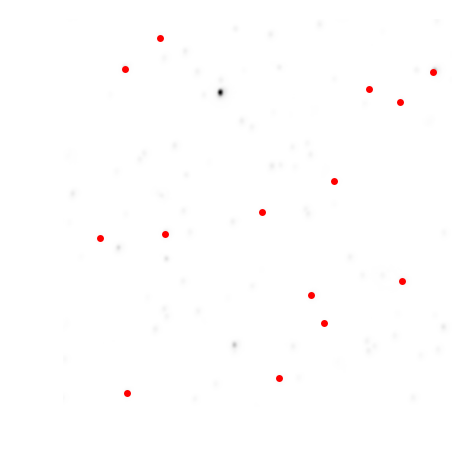

In [16]:
plt.figure(figsize=(5,5));
plt.imshow(smoothed);
plt.plot(centers[:, 2], centers[:, 1], 'r.', ms=10);
plt.xlim([0, smoothed.shape[0]])
plt.ylim([smoothed.shape[1], 0])
plt.axis('off');

## Plot max projection

In [17]:
beadInd = 1
average = beads[beadInd]

In [18]:
plane = IntSliderWidget(min=0, max=average.shape[0]-1, step=1, value=average.shape[0]/2)
interactive(plotAvg, i=plane)

NameError: name 'IntSliderWidget' is not defined

## Plot 2D slices

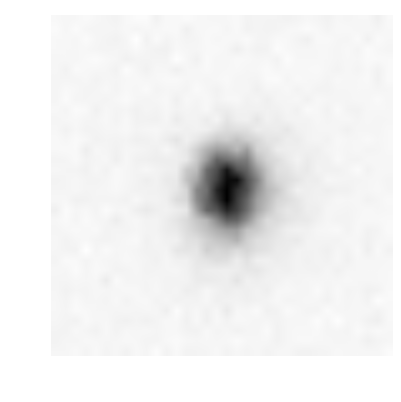

In [19]:
plt.imshow(average.mean(axis=0));
plt.axis('off');

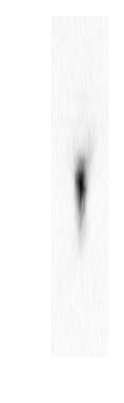

In [20]:
plt.imshow(average.mean(axis=1), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

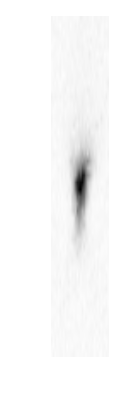

In [21]:
plt.imshow(average.mean(axis=2), aspect = pxPerUmLat/pxPerUmAx);
plt.axis('off');

## Plotting

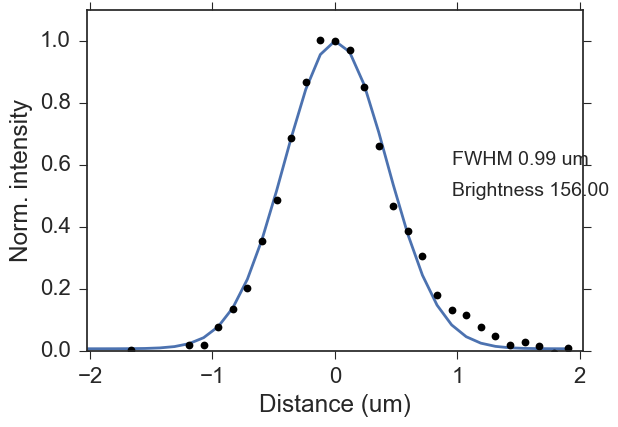

In [22]:
plotPSF(latProfile[beadInd][0],latProfile[beadInd][1],latProfile[beadInd][2],latProfile[beadInd][3],pxPerUmLat,PSF.Max.iloc[beadInd])

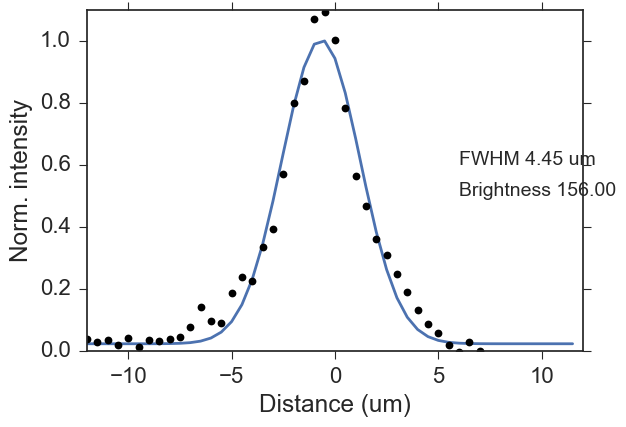

In [23]:
plotPSF(axProfile[beadInd][0],axProfile[beadInd][1],axProfile[beadInd][2],axProfile[beadInd][3],pxPerUmAx,PSF.Max.iloc[beadInd])